In [ ]:
!pip install japanize-matplotlib
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c22dd36607360943a7b51e26b39c08bc18b5368ad8eee7eb51e1fec6c9958050
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
df = pl.read_csv('/content/drive/MyDrive/study/modern_marketing_research/9/Bass.txt', separator=',')
print(df.shape)
df.head()

(15, 5)


時点,購買者数,累積購買者数,一期前累積購買者数,一期前累積購買者数の二乗
i64,i64,i64,i64,i64
1,4998,4998,0,0
2,5398,10396,4998,24980004
3,5611,16007,10396,108076816
4,5574,21581,16007,256224049
5,5292,26873,21581,465739561


In [ ]:
X = df[['一期前累積購買者数', '一期前累積購買者数の二乗']]
X = sm.add_constant(X)
y = df['購買者数'].to_numpy()
X_train, X_val = X[:10, :], X[10:, :]
y_train, y_val = y[:10], y[10:]
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.471e+05
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           2.23e-19
Time:                        12:16:18   Log-Likelihood:                -23.560
No. Observations:                  10   AIC:                             53.12
Df Residuals:                       7   BIC:                             54.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4999.6345      2.453   2038.443      0.000    4993.835    5005.434
x1             0.0998      0.000    368.709      0.000       0.099       0.100
x2         -3.994e-06    6.1e-09   -654.258      0.000   -4.01e-06   -3.98e-06
==============================================================================
Omnibus:                        0.913   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.034
Skew:                           0.142   Prob(JB):                        0.983
Kurtosis:                       3.049   Cond. No.                     2.41e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def transform(a, b, c):
    m = (-b-np.sqrt(b*b - 4*a*c))/(2*c)
    p = a/m
    q = p + b
    return m, p, q

a, b, c = results.params
print(a,b,c)
transform(a, b, c)

4999.634547558433 0.09983040504598784 -3.993729564987342e-06


(50022.797468062716, 0.09994712012558819, 0.19977752517157604)

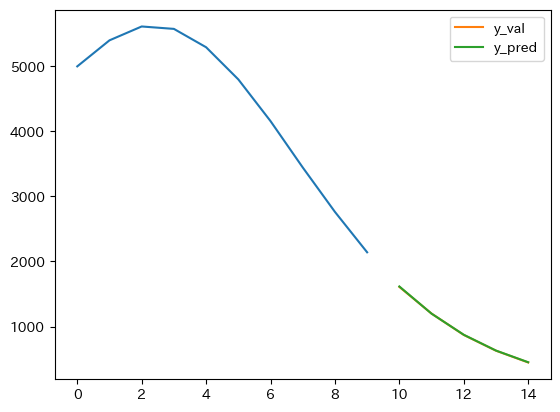

In [ ]:
y_pred = model.predict(params=results.params, exog=X_val)
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(10), y=y_train, ax=ax)
sns.lineplot(x=np.arange(10, 15), y=y_val, ax=ax, label='y_val')
sns.lineplot(x=np.arange(10, 15), y=y_pred, ax=ax, label='y_pred')
plt.show()